In [1]:
import pandas as pd

In [2]:
x=pd.read_csv('GUIDE_Train.csv')

In [3]:
b=x.drop_duplicates()

In [4]:
b.isna().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5459368
IncidentGrade           51322
ActionGrouped         9438232
ActionGranular        9438232
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9397469
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9420765
FileName                    0
FolderPath

In [4]:
b=b.drop(columns=['LastVerdict','SuspicionLevel','AntispamDirection','ResourceType','Roles','EmailClusterId','ActionGranular','ActionGrouped','MitreTechniques','ThreatFamily'])

In [5]:
b=b.dropna(subset='IncidentGrade')

In [6]:
a=b[['Category','IncidentGrade','EntityType','EvidenceRole']]

In [7]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
for col in a.columns:
   a[col]=lr.fit_transform(a[col])

C:\Users\srini\AppData\Local\Temp\ipykernel_7164\2273269712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[col]=lr.fit_transform(a[col])
C:\Users\srini\AppData\Local\Temp\ipykernel_7164\2273269712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[col]=lr.fit_transform(a[col])
C:\Users\srini\AppData\Local\Temp\ipykernel_7164\2273269712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [8]:
from sklearn.feature_selection import chi2
x=a.drop(columns='IncidentGrade')
y=a['IncidentGrade']

In [9]:
chisquare=chi2(x,y)

In [10]:
chisquare

(array([527100.50573359, 720437.1157941 , 109410.83940419]),
 array([0., 0., 0.]))

In [11]:
chi_valuse=pd.Series(chisquare[0],index=x.columns)
chi_valuse.sort_values(ascending=False,inplace=True)

In [38]:
import matplotlib.pyplot as plt

<Axes: >

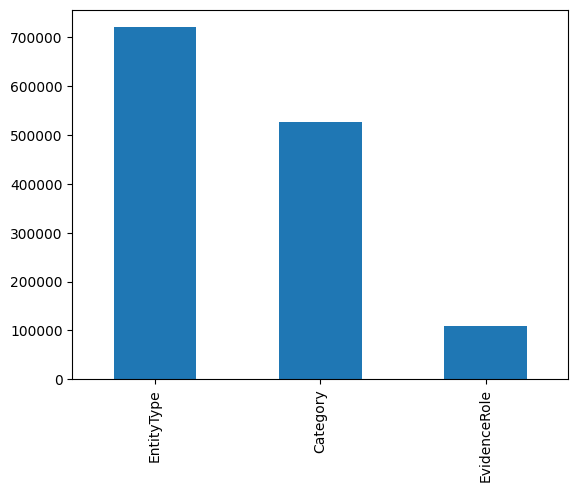

In [12]:
chi_valuse.plot.bar()

In [13]:
anova=b.drop(columns=['Category','IncidentGrade','EntityType','EvidenceRole','Timestamp'])

In [14]:
from sklearn.feature_selection import SelectKBest, f_classif

In [15]:
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(anova, y)

selected_features = anova.columns[selector.get_support()]
print(f"Selected Features: {selected_features.tolist()}")

Selected Features: ['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle', 'Sha256', 'IpAddress', 'AccountObjectId', 'DeviceName', 'NetworkMessageId', 'FileName', 'FolderPath', 'CountryCode', 'State', 'City']


In [16]:
k=selected_features.tolist()
e=['EntityType','Category']
k.extend(e)
selectmodel=b[k]

In [23]:
selectmodel

,OrgId,IncidentId,AlertId,AlertTitle,CountryCode,State,City,EntityType
0,0,612,123247,6,31,6,3,Ip
1,88,326,210035,43,242,1445,10630,User
2,809,58352,712507,298,242,1445,10630,Url
3,92,32992,774301,2,242,1445,10630,Url
4,148,4359,188041,74,242,1445,10630,User
...,...,...,...,...,...,...,...,...
9516832,0,90,496631,6,242,1445,10630,CloudLogonRequest
9516833,59,196410,748366,2,242,1445,10630,Url
9516834,44,14117,7425,57,242,1445,10630,MailMessage
9516835,43,644,8973,10,242,1445,10630,Ip


In [24]:
for i in ['EntityType']:
    selectmodel[i]=lr.fit_transform(selectmodel[i])
     

C:\Users\srini\AppData\Local\Temp\ipykernel_21736\2732657311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selectmodel[i]=lr.fit_transform(selectmodel[i])


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(selectmodel, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()
k=lo.fit(x_train,y_train)

In [38]:
from sklearn.metrics import accuracy_score
y_pred = lo.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

In [39]:
accuracy

0.52664154976884

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

stack = StackingClassifier(estimators=[('lr', lr), ('dt', dt)], final_estimator=LogisticRegression())

stack.fit(x_train, y_train)



In [ ]:
y_pred1=ensemble.predict(x_test)
accuracy2=accuracy_score(y_pred1,y_test)

In [49]:
import pickle
with open('ensemble.pkl','wb')as m:
    pickle.dump(k,m)


In [62]:
accuracy

0.5312036802032697

In [63]:
from sklearn.ensemble import RandomForestClassifier
rr=RandomForestClassifier()
rr.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
import pickle
with open('model.pkl','wb')as file:
    pickle.dump(rr,file)

In [64]:
ypred=rr.predict(x_test)
accuracy=accuracy_score(y_test,ypred)

In [65]:
accuracy

0.9864869301175797

In [14]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
b['IncidentGrade']=lr.fit_transform(b['IncidentGrade'])
b['Category']=lr.fit_transform(b['Category'])
b['EntityType']=lr.fit_transform(b['EntityType'])
b['EvidenceRole']=lr.fit_transform(b['EvidenceRole'])
b['time']=lr.fit_transform(b['time'])    

In [15]:
b

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,date,time
0,180388628218,0,612,123247,2024-06-04 06:05:15+00:00,7,6,10,2,15,...,289573,117668,3586,5,66,31,6,3,2024-06-04,21915
1,455266534868,88,326,210035,2024-06-14 03:01:25+00:00,58,43,7,1,32,...,289573,117668,3586,5,66,242,1445,10630,2024-06-14,10885
2,1056561957389,809,58352,712507,2024-06-13 04:52:55+00:00,423,298,10,1,31,...,289573,117668,3586,5,66,242,1445,10630,2024-06-13,17575
3,1279900258736,92,32992,774301,2024-06-10 16:39:36+00:00,2,2,1,0,31,...,289573,117668,3586,5,66,242,1445,10630,2024-06-10,59976
4,214748368522,148,4359,188041,2024-06-15 01:08:07+00:00,9,74,6,2,32,...,289573,117668,3586,5,66,242,1445,10630,2024-06-15,4087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08 15:26:08+00:00,7,6,10,2,6,...,289573,117668,3586,5,66,242,1445,10630,2024-06-08,55568
9516833,1228360650033,59,196410,748366,2024-06-06 09:40:08+00:00,2,2,1,0,31,...,289573,117668,3586,5,66,242,1445,10630,2024-06-06,34808
9516834,867583395122,44,14117,7425,2024-06-11 22:51:03+00:00,78,57,7,0,21,...,289573,117668,3586,5,66,242,1445,10630,2024-06-11,82263
9516835,395136991850,43,644,8973,2024-05-20 23:01:01+00:00,52,10,9,0,15,...,289573,117668,3586,5,66,242,1445,10630,2024-05-20,82861


In [29]:
b.corr()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,time
Id,1.000000,0.006470,0.014062,0.008627,0.002667,0.008842,-0.007111,-0.023475,0.011776,-0.003373,0.003008,0.002829,0.012384,-0.009545,-0.003518,-0.003940,-0.001660,-0.004340,0.008643,-0.004133,0.002611,0.001106,-0.000319,-0.002468,-0.002586,-0.001538,0.001947,0.001079,-0.002765,0.001581,0.001664,0.012274,0.009762,0.009867,0.003005
OrgId,0.006470,1.000000,0.018285,0.151126,0.150213,-0.005719,0.077445,-0.013100,0.021751,0.011081,0.008312,0.000259,0.115293,0.009425,-0.022005,-0.017490,-0.020064,-0.025979,0.041008,0.016301,-0.003435,-0.012024,-0.016066,-0.055507,-0.060058,-0.043085,0.008871,0.024174,-0.011482,-0.009858,-0.010303,0.023493,0.023043,0.025351,0.024313
IncidentId,0.014062,0.018285,1.000000,0.409740,0.040829,0.103416,0.045699,-0.121290,0.023344,-0.066325,-0.038275,-0.027562,0.132311,-0.025669,-0.018041,0.010313,-0.016422,-0.018342,0.010684,0.059649,0.014783,0.004730,0.006222,-0.181187,-0.180460,-0.006870,-0.018953,-0.001018,-0.013227,-0.046393,-0.046196,0.045761,0.040072,0.041666,0.006966
AlertId,0.008627,0.151126,0.409740,1.000000,0.125071,0.146234,0.107140,0.140760,-0.045228,-0.021025,-0.058830,0.005006,0.082241,0.064461,-0.085698,0.026693,-0.085642,-0.085023,0.028932,0.187326,0.003136,0.001266,0.005051,-0.144485,-0.147085,-0.029185,0.043199,0.049448,-0.008791,-0.074789,-0.075076,-0.161707,-0.157252,-0.156072,-0.007135
DetectorId,0.002667,0.150213,0.040829,0.125071,1.000000,0.239663,-0.056697,-0.114979,0.046402,-0.077264,-0.031367,-0.024706,0.040041,0.040000,0.021179,0.027078,0.022947,0.000001,-0.035508,0.005077,-0.016742,-0.049306,-0.046775,0.017389,0.008177,-0.028109,-0.045056,-0.062340,-0.033978,-0.004844,-0.005184,0.069320,0.063350,0.063060,0.010024
AlertTitle,0.008842,-0.005719,0.103416,0.146234,0.239663,1.000000,-0.093770,-0.136838,0.008904,-0.205127,0.011756,0.007498,0.082538,0.059921,0.022395,-0.060509,0.020225,0.019438,-0.000660,-0.141964,0.006599,-0.001577,-0.000257,-0.008915,-0.009296,-0.002995,-0.040386,-0.086762,0.003393,0.011382,0.011194,0.074000,0.067494,0.067417,0.044476
Category,-0.007111,0.077445,0.045699,0.107140,-0.056697,-0.093770,1.000000,0.176176,-0.129470,0.042982,0.036924,0.044814,-0.078510,0.182419,-0.068918,-0.027736,-0.067712,-0.060203,0.035562,0.060645,0.050705,-0.006992,-0.009693,-0.131674,-0.129052,0.005018,0.072524,0.078057,-0.000604,0.184013,0.183687,-0.062000,-0.052548,-0.052404,-0.038642
IncidentGrade,-0.023475,-0.013100,-0.121290,0.140760,-0.114979,-0.136838,0.176176,1.000000,-0.141821,0.157304,0.080107,0.138860,-0.153156,0.083537,-0.089513,0.033434,-0.090270,-0.069799,0.103871,0.159406,0.000895,0.008908,0.008177,-0.004333,-0.002825,0.003047,0.159435,0.158501,0.017694,0.065303,0.065349,-0.291138,-0.266188,-0.267117,-0.055651
EntityType,0.011776,0.021751,0.023344,-0.045228,0.046402,0.008904,-0.129470,-0.141821,1.000000,-0.388060,0.027653,0.034785,0.322823,-0.338254,-0.601780,-0.556877,-0.595880,-0.628164,0.039116,-0.032106,-0.041413,-0.021668,-0.023945,0.268674,0.268679,-0.010710,0.124166,0.093884,0.059321,0.020358,0.020373,0.177155,0.161622,0.161454,0.024493
EvidenceRole,-0.003373,0.011081,-0.066325,-0.021025,-0.077264,-0.205127,0.042982,0.157304,-0.388060,1.000000,0.211520,-0.159692,-0.480992,-0.243742,0.573091,0.563330,0.571442,0.592588,0.287400,0.108318,-0.038499,-0.019165,-0.021179,0.161415,0.158326,-0.014386,-0.085801,-0.020893,0.030923,0.159069,0.159186,-0.263941,-0.240799,-0.240547,-0.045443


In [30]:
b.corr().to_csv('correlation.csv')

In [36]:
import matplotlib.pyplot as plt

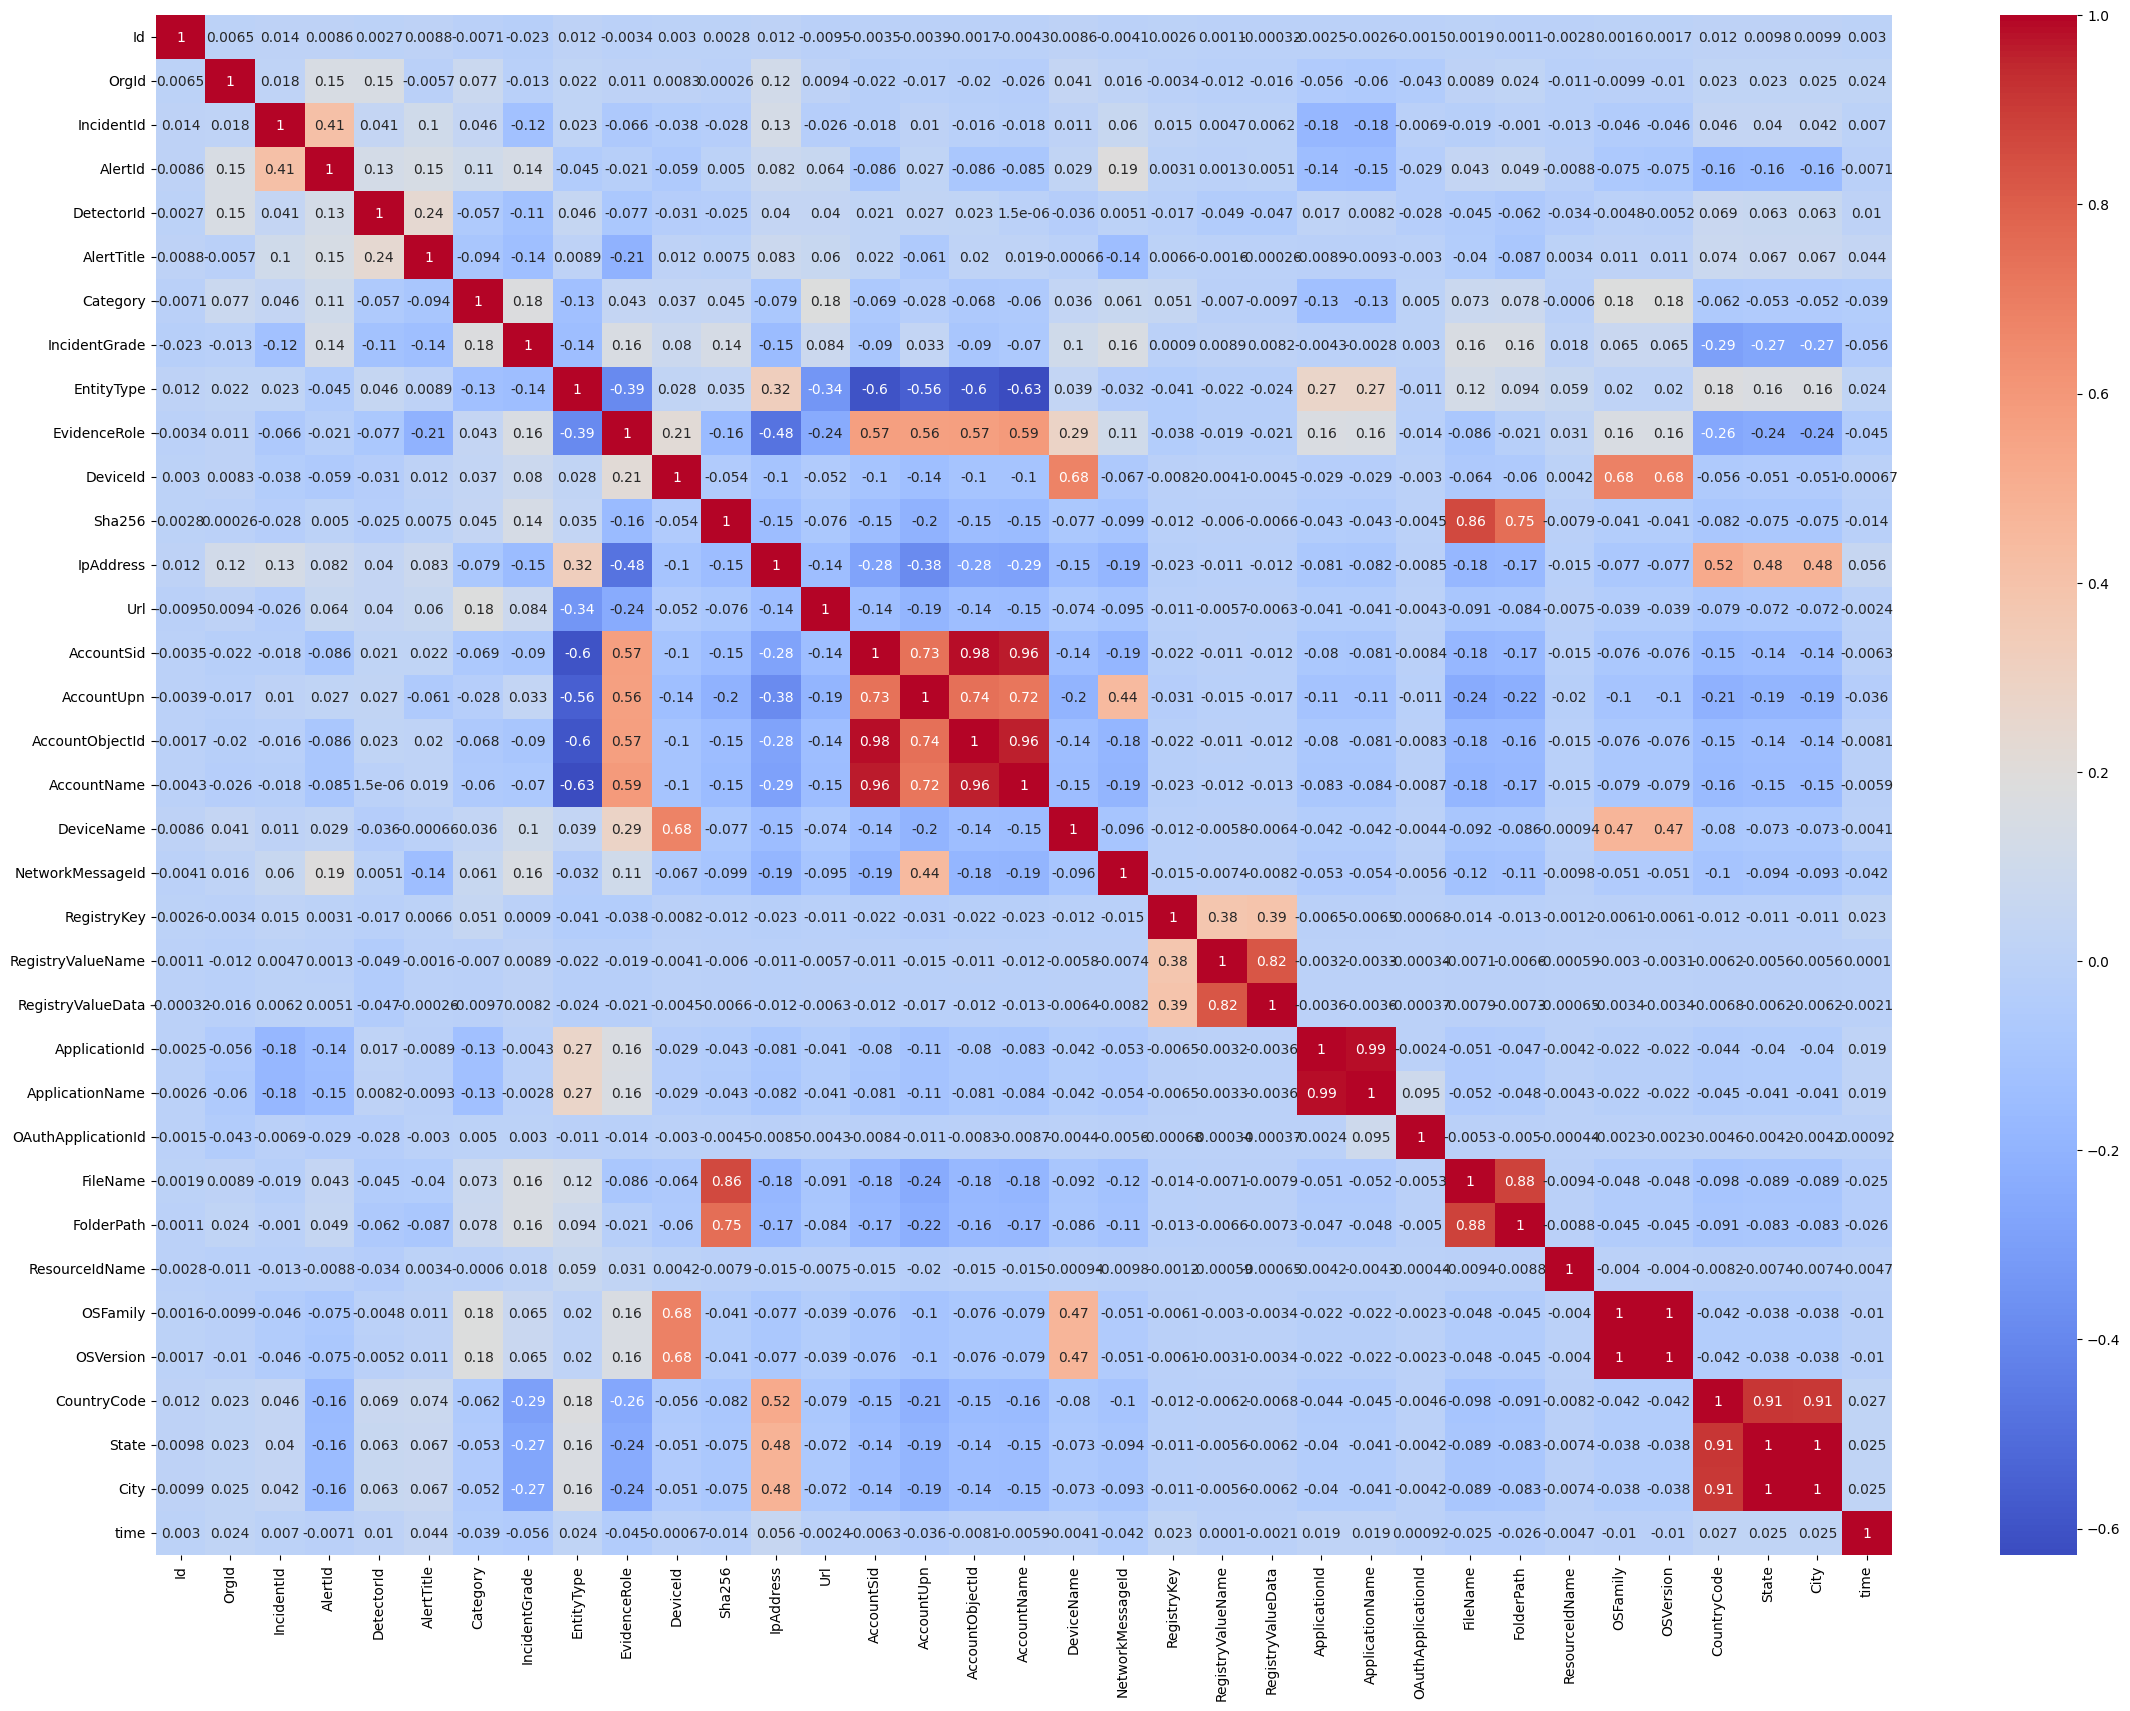

<Figure size 640x480 with 0 Axes>

In [46]:
import seaborn as sns
plt.figure(figsize=(28, 20)) 
sns.heatmap(b.corr(),  annot=True, cmap="coolwarm", annot_kws={"size": 10})
plt.show()
plt.savefig('correlation.png', dpi=300, bbox_inches='tight')